# Droplets

## Different morphologies of the droplet state

Let us consider the equilibrium droplet state, _i.e._, $\alpha<0$ and $-\sqrt{\frac{-\alpha}{\beta}}<\phi_0<\sqrt{\frac{-\alpha}{\beta}}$, at $t\rightarrow\infty$.
For a fixed value of $\alpha$, depending on the global average density $\phi_0$, we can have 3 different types of droplet state.
For $\phi_0<0$, we have a liquid droplet surrounded by vapour phase.
For $\phi_0>0$, we have a vapour bubble surrounded by liquid phase.
Finally for $\phi_0=0$, the liquid droplet forms a strip, as we can see from the figure below.
Note that periodic boundary condition is assumed in both $x$ and $y$-direction.

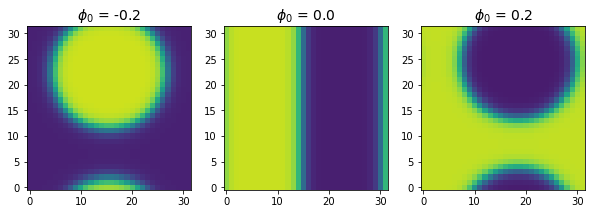

In [210]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/droplet-morphologies.png')

## Flat interface ($d=1$ dimension)

Let us consider the strip geometry ($\phi_0=0$).
As we can see from the middle picture above, the interface between the liquid and the gas phase is completely flat, reducing the problem to a one-dimensional problem $\phi(x,t)$.
In the steady (or equilibrium) state $t\rightarrow\infty$, the density profile might look something like in the plot below:

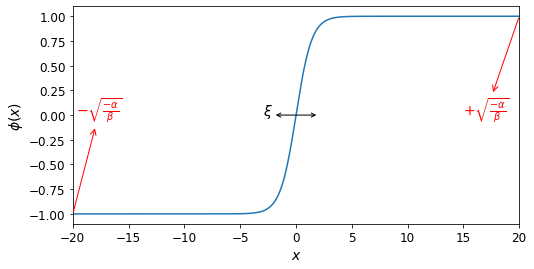

In [208]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/interfacial-profile.png')

The plot above shows the typical steady state density field $\phi(x)$ in an infinite one-dimensional system.
At $x=-\infty$, we have the gas phase, where $\phi=-\sqrt{\frac{-\alpha}{\beta}}$ and at $x=+\infty$, we have the liquid phase, where $\phi=\sqrt{\frac{-\alpha}{\beta}}$.
We then have an interface, assumed to be located at the origin $x=0$, which separates the liquid from the gas phase.
As we can see, the interface is not sharp, but rather is spread across some interfacial width $\xi$.
In real physical situations, the interfacial width is typically a few molecular lengths ($\sim\text{nm}$), however in simulations, we usually use a much wider interfacial width for numerical stability.
This is fine as long as the lengthscales of the problem we are interested in are much larger than $\xi$.

### Interfacial profile $\phi(x)$ and interfacial width $\xi$

In this subsection, we will derive the interfacial profile $\phi(x)$ and the interfacial width $\xi$ for a flat interface, which is effectively a one-dimensional (1d) system.

In 1d, the coarse-grained free energy can be written as:
\begin{equation}
\mathcal{F}[\phi] = 
A\int_{-\infty}^\infty dx  
\underbrace{\bigg\{ \frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4 + \frac{\kappa}{2}|\nabla\phi|^2 \bigg\}}_{\text{1d energy density}},
\end{equation}
where $A$ is the area of the system along $y$ and $z$ direction.
(In 1d, the system is translationally invariant along $y$ and $z$.)
The 1d energy density consists of the local term: $\frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4=f(\phi)$, which we will call $f(\phi)$, and the semi-local term $\frac{\kappa}{2}|\nabla\phi|^2$.

The steady state density, is given by the solution to the equation:
\begin{equation}
\mu(x) = \frac{\delta\mathcal{F}}{\delta\phi} = 0 \quad\Rightarrow\quad
\frac{df}{d\phi} - \kappa\frac{d^2\phi}{dx^2} = 0,
\end{equation}
where $f(\phi) = \frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4$ is the local energy density.
To solve the above equation, we multiply both sides of the equation by $d\phi/dx$ to get:
\begin{align}
\frac{df}{dx} - \kappa\frac{d^2\phi}{dx^2}\frac{d\phi}{dx} = 0 
\quad\Rightarrow\quad 
\frac{df}{dx} - \frac{\kappa}{2}\frac{d}{dx}\left(\frac{d\phi}{dx}\right)^2 = 0
\end{align}
Now we can integrate with respect to $x$ to get the __Noether equation__:
\begin{equation}
f(\phi) - \frac{\kappa}{2}\left(\frac{d\phi}{dx}\right)^2 = C, 
\end{equation}
where $C$ is the constant of integration. 
The above equation can also be derived from Noether's theorem and the constant $C$ is a Noether current.
The constant of integration can be found by substituting $x=\infty$ to get 
$C=f\left(\sqrt{\frac{\alpha}{\beta}}\right)=-\frac{\alpha^2}{4\beta}$.
After rearranging, we get:
\begin{align}
\frac{d\phi}{\sqrt{f(\phi) + \frac{\alpha^2}{4\beta}}} = \sqrt{\frac{2}{\kappa}} dx,
\end{align}
which we can integrate from $x=0$ to $x$.
\begin{align}
\int_{0}^{\phi(x)} \frac{d\phi}{\sqrt{f(\phi) + \frac{\alpha^2}{4\beta}}} 
= \sqrt{\frac{2}{\kappa}}x
\end{align}
Note that we can factorize:
\begin{align}
\underbrace{\frac{\alpha}{2}\phi^2 + \frac{\beta}{2}\phi^4}_{f(\phi)} + \frac{\alpha^2}{4\beta} 
= \frac{1}{4\beta}\left(\alpha+\beta\phi^2\right)^2,
\end{align}
so that the integral becomes:
\begin{align}
\int_{0}^{\phi(x)} \frac{d\phi}{\alpha + \beta\phi^2} = \sqrt{\frac{1}{2\kappa\beta}}x \quad\Rightarrow\quad
\frac{1}{\alpha}\int_{0}^{\phi(x)} \frac{d\phi}{1 - \frac{\beta}{-\alpha}\phi^2} = \sqrt{\frac{1}{2\kappa\beta}}x
\end{align}
Note that $\alpha<0$. 
Using $\frac{d}{dx}\tanh^{-1}(x)=\frac{1}{1-x^2}$, we can then solve this integral to get:
\begin{equation}
\phi(x) = \sqrt{\frac{-\alpha}{\beta}}\tanh\left(\frac{x}{\xi}\right), \quad\text{where}\quad
\xi = \sqrt{\frac{2\kappa}{-\alpha}}
\end{equation}
is the interfacial width.

### Surface tension $\gamma$

In this subsection, we will introduce the concept of surface tension $\gamma$ and derive its expression for a flat interface.
First, let us consider the local free energy density $f(\phi)+\frac{\kappa}{2}\left(\frac{d\phi}{dx}\right)^2$, which consists of the local and semi-local terms.

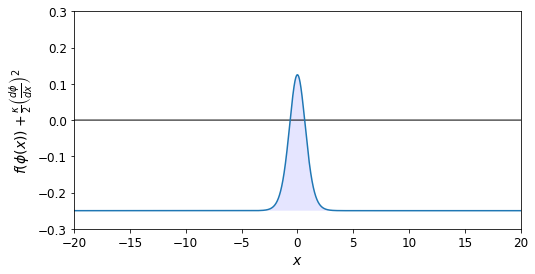

In [193]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/interfacial-energy.png')

The plot above shows the free energy density $f(\phi(x))+\frac{\kappa}{2}\left(\frac{d\phi}{dx}\right)^2$ as a function of $x$ for the density profile $\phi(x)$, shown in the previous plot.
In the bulk, the energy density is mostly flat and negative, which is equal to $f\left(\sqrt{\frac{-\alpha}{\beta}}\right)=-\frac{\alpha^2}{4\beta}$.
Across the interface, the energy density goes up and then goes down, back to its bulk value.
The interfacial energy is defined to be excess free energy across this interface, _i.e._, the shaded region in the plot above.
More specifically, the interfacial energy is defined to be:
\begin{equation}
\mathcal{F}_{\text{interface}} = A\int_{-\infty}^{\infty}
\left\{f(\phi(x)) + \frac{\kappa}{2}\left(\frac{d\phi}{dx}\right)^2 + \frac{\alpha^2}{4\beta} \right\}dx.
\end{equation}
Now we can refer to the __Noether equation__ which we derived above, _i.e._:
\begin{equation}
f(\phi) - \frac{\kappa}{2}\left(\frac{d\phi}{dx}\right)^2 = C = -\frac{\alpha^2}{4\beta}
\end{equation}
Substituting this to $\mathcal{F}_{\text{interface}}$, the interfacial energy becomes:
\begin{equation}
\mathcal{F}_{\text{interface}} = A\kappa\int_{-\infty}^{\infty} \left(\frac{d\phi}{dx}\right)^2 dx.
\end{equation}
Finally the surface tension $\gamma$ is defined to be the interfacial energy per interfacial area. Thus we get:
\begin{equation}
\gamma = \kappa\int_{-\infty}^{\infty} \left(\frac{d\phi}{dx}\right)^2 dx = \kappa\int_{-\sqrt{-\alpha/\beta}}^{\sqrt{-\alpha/\beta}} \frac{d\phi}{dx} \, d\phi
\end{equation}
Using Noether's equation, we can substitute $\frac{d\phi}{dx}$: 
\begin{equation}
\frac{d\phi}{dx} = \sqrt{\frac{2}{\kappa}} \sqrt{ f(\phi) - f\left(\sqrt{\frac{-\alpha}{\beta}}\right) }
= \sqrt{\frac{2}{\kappa}} \sqrt{ f(\phi) + \frac{\alpha^2}{4\beta} },
\end{equation}
so the surface tension becomes:
\begin{equation}
\gamma = \sqrt{2\kappa} \int_{-\sqrt{-\alpha/\beta}}^{\sqrt{-\alpha/\beta}} \sqrt{f(\phi) + \frac{\alpha^2}{4\beta}}\,d\phi
\end{equation}
Substituting $f(\phi)=\frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4$, we can solve the above integral to get:
\begin{equation}
\gamma = \sqrt{\frac{-8\kappa\alpha^3}{9\beta^2}}.
\end{equation}
Note that $\alpha<0$.

## Curved interface ($d>1$ dimension)

We will now go back to $d>1$ dimensional problems.
In general, the interface between the liquid and the gas phase is not always flat but often curved.

### Microscopic picture of surface tension

Let us consider a liquid water droplet. 
Inside the bulk liquid, each water molecule has $z$ nearest neighbours. 
However, the water molecules at the liquid/gas interface only have $z/2$ nearest neighbours. 
That means to create a new interface, some bonds have to be broken.
The energy required to break these bonds (per unit interfacial area) is called the surface tension $\gamma$. 

### Macroscopic picture of surface tension

Let us consider a liquid droplet in three-dimension and far from the boundaries (such as solid walls).
The total free energy of the liquid droplet has two contributions:
\begin{equation}
\mathcal{F} = \mathcal{F}_{\text{bulk}} + \mathcal{F}_{\text{interface}}.
\end{equation}
The first contribution comes from the bulk free energy $\mathcal{F}_{\text{bulk}}$, which is equal to the local free energy density $f(\phi)$ multiplied by the volume of the droplet $V$:
\begin{equation}
\mathcal{F}_{\text{bulk}} \simeq f(\phi_{l}) V = \text{constant}.
\end{equation}
Note that we have assumed the density of the liquid inside the droplet, $\phi_{l}$, to be constant throughout the bulk of the droplet.
Consequently, the volume of the liquid droplet is also constant by conservation of mass.
Thus $\mathcal{F}_{\text{bulk}}$ is constant.
The second contribution to $\mathcal{F}$ comes from the interfacial energy $\mathcal{F}_{\text{interface}}$, 
which is equal to the surface tension $\gamma$ multiplied by the surface area of the droplet $S$:
\begin{equation}
\mathcal{F}_{\text{interface}} \simeq \gamma S.
\end{equation}
Since $\gamma>0$, the equilibrium shape of the liquid droplet, which minimizes the total free energy $\mathcal{F}$, is therefore a sphere.

The surface tension $\gamma$ can also be thought as a force per unit length.
To illustrate this, let us consider a thin film of soap, as shown in the picture below.
Technically, a soap film is an air-liquid-air interface, so the surface tension would be doubled.
Let us imagine that this two-dimensional soap film is confined between three fixed rods (black colour in the picture below) and a movable rod which can move laterally along $x$ (red colour in the picture below).
The energy stored inside this soap film is then:
\begin{equation}
\mathcal{F}_{\text{interface}} = \gamma S = \gamma \ell x.
\end{equation}
Therefore the force by the soap film on the red rod is equal to:
\begin{equation}
F_{\text{interface}} = -\frac{d\mathcal{F}_{\text{interface}}}{dx} = -\gamma \ell.
\end{equation}
$F_{\text{interface}}$ is negative since the direction is to the left in the picture below.
Thus a surface tension $\gamma$ is a force (per unit length) which tends to minimize the surface area of the interface.

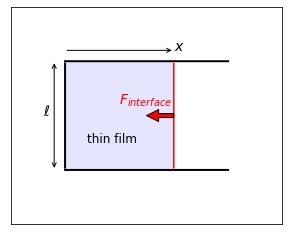

In [192]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/work.png')

### Stress tensor 

Consider a smooth surface $S$, which can be open or closed.
For an open surface, we can arbitrarily define one side of the surface to be the _inner_ side and 
the other side to be the _outer_ side.
For a closed surface, on the other hand, the inner side is always defined to be the volume which is enclosed by the surface.
At any point $P$ on the surface, we may then define the outward normal unit vector $\hat{\mathbf{n}}$ to be perpendicular to $S$ and point in the outer direction.

Let us consider some surface element $d\mathbf{S}=dS\,\hat{\mathbf{n}}$ inside some fluid, 
as depicted in the picture below.
The direction of $d\mathbf{S}$ is defined to be the outward unit normal, which in this case is assumed to point to the right.
The differential force acting on the inner fluid by the outer fluid (or by the boundary if it is a solid wall on the other side) is then given by:
\begin{equation}
dF_\alpha = \sigma_{\alpha\beta} dS_{\beta},
\end{equation}
where $\sigma_{\alpha\beta}(\mathbf{r})$ is the surface tensor, which is evaluated at a point on this surface element.
In the case of an isotropic stress, the stress tensor can be written as:
\begin{equation}
\sigma_{\alpha\beta}(\mathbf{r}) = -p(\mathbf{r})\delta_{\alpha\beta},
\end{equation}
where $p(\mathbf{r})$ is called the pressure of the fluid at point $\mathbf{r}$ in space.
Notice the negative sign. 
If we have a fluid inside a cubic box of size $L\times L\times L$, 
the fluid will push each side of the box, with force magnitude $pL^2$ (if $p$ is positive).

Let us consider a fluid inside some volume $V$.
$V$ can be enclosed by other fluid or solid walls.
Let us denote $\mathbf{f}(\mathbf{r})$ to be the force density (force per unit volume) acting on the fluid at $\mathbf{r}$.
The net force acting on the fluid (by the surrounding fluid or the solid boundaries) is then given by the integral of $\mathbf{f}$ over the whole fluid volume:
\begin{equation}
\mathbf{F} = \int_V \mathbf{f} \, dV.
\end{equation}
However, from the definition of the stress tensor, the net force acting on the fluid by the boundary can also be written as:
\begin{equation}
F_\alpha = \oint_{\partial V} \sigma_{\alpha\beta} \, dS_\beta.
\end{equation}
Thus,
\begin{align}
\int_V f_\alpha \, dV = \oint_{\partial V} \sigma_{\alpha\beta} \, dS_\beta = \int_V \partial_\beta\sigma_{\alpha\beta} \, dV,
\end{align}
and therefore,
\begin{equation}
f_\alpha = \partial_\beta\sigma_{\alpha\beta}.
\end{equation}

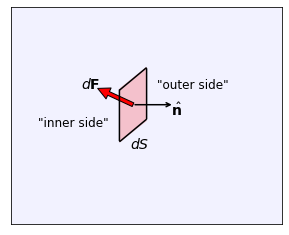

In [191]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/stress-tensor.png')

Now we will derive the formula for the _elastic_ stress tensor for our free energy:
\begin{equation}
\mathcal{F}[\phi] = \int_V \bigg\{ \underbrace{\frac{\alpha}{2}\phi^2 + \frac{\beta}{2}\phi^4 + 
\frac{\kappa}{2}|\nabla\phi|^2}_{g(\phi,\partial_\alpha\phi)}   \bigg\}\,dV.
\end{equation}
Suppose that we have some fluid, confined to a trapezoidal box of volume $V$ in space, 
as we can see in the picture below.
Now we can deform the fluid _affinely_ (_e.g._ by shearing the box) through some infinitesimal strain $\delta\mathbf{r}$.
In other words we displace every small patch of material at $\mathbf{r}$ to $\mathbf{r}+\delta\mathbf{r}$.
Under this _affine_ deformation, the fluid density $\phi(\mathbf{r})$ and the volume of the box $V$ transform as:
\begin{align}
\phi(\mathbf{r}) \rightarrow \phi(\mathbf{r}-\delta\mathbf{r})  \quad\text{and}\quad
V &\rightarrow V + \delta V.
\end{align}
In other words, affine deformation simply translates the value of $\phi$ through space by $\delta\mathbf{r}$.
By Taylor expanding $\phi(\mathbf{r}-\delta\mathbf{r})$, we can find:
\begin{equation}
\phi(\mathbf{r}-\delta\mathbf{r}) = \phi(\mathbf{r}) - \underbrace{\delta\mathbf{r}\cdot\nabla\phi}_{\delta\phi}.
\end{equation}
Now we can calculate the change in the total free energy due to this affine deformation:
\begin{align}
\delta \mathcal{F} &= \mathcal{F}[\phi+\delta\phi] - \mathcal{F}[\phi] \\
&= \int_{V+\delta V} g(\phi+\delta\phi,\partial_\alpha\phi+\delta\partial_\alpha\phi) \, dV - 
\int_{V} g(\phi,\partial_\alpha\phi) \, dV \\
&= \int_{V} g(\phi+\delta\phi,\partial_\alpha\phi+\delta\partial_\alpha\phi) \, dV + 
\int_{\delta V} g(\phi+\delta\phi,\partial_\alpha\phi+\delta\partial_\alpha\phi) \, dV - 
\int_{V} g(\phi,\partial_\alpha\phi) \, dV
\end{align}
Now we can Taylor expand:
\begin{equation}
g(\phi+\delta\phi,\partial_\alpha\phi+\delta\partial_\alpha\phi) = 
g(\phi,\partial_\alpha\phi) + 
\delta\phi \frac{\partial g}{\partial\phi} + 
(\delta\partial_\alpha\phi) \frac{\partial g}{\partial(\partial_\alpha\phi)}
\end{equation}
In particular, the second integral becomes:
\begin{equation}
\int_{\delta V} g(\phi+\delta\phi,\partial_\alpha\phi+\delta\partial_\alpha\phi) \, dV
\simeq \int_{\delta V} g(\phi,\partial_\alpha\phi) \, dV,
\end{equation}
where we have neglected order $\sim\delta^2$.
Thus the change in the total energy is
\begin{align}
\delta \mathcal{F} &= 
\int_{V} \bigg\{ \delta\phi \frac{\partial g}{\partial\phi} + (\partial_\alpha\delta\phi) \frac{\partial g}{\partial(\partial_\alpha\phi)} \bigg\}\,dV + 
\int_{\delta V} g(\phi,\partial_\alpha\phi) \, dV \\
&= 
\int_{V} \bigg\{ \delta\phi \frac{\partial g}{\partial\phi} + (\partial_\alpha\delta\phi) \frac{\partial g}{\partial(\partial_\alpha\phi)} \bigg\}\,dV + 
\oint_{\partial V} g(\phi,\partial_\alpha\phi) \, \delta\mathbf{r}\cdot d\mathbf{S}.
\end{align}
Note that when you displace a surface element $d\mathbf{S}$ by $\delta\mathbf{r}$, the volume covered by this travelling surface element is $\delta\mathbf{r}\cdot d\mathbf{S}$.
Next we can use the integration by parts on the first term:
\begin{align}
\delta \mathcal{F} &= 
\int_{V} \bigg\{ 
     \frac{\partial g}{\partial\phi} -
     \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right) \bigg\} \delta\phi \,dV + 
\oint_{\partial V} \frac{\partial g}{\partial(\partial_\alpha\phi)} \delta\phi \, dS_\alpha + 
\oint_{\partial V} g \delta r_\alpha  \,  dS_\alpha \\
&= 
-\int_{V} \mu \delta r_\alpha \partial_\alpha\phi \, dV - 
\oint_{\partial V} \frac{\partial g}{\partial(\partial_\alpha\phi)} \delta r_\beta \partial_\beta\phi \, dS_\alpha + 
\oint_{\partial V} g \delta r_\alpha  \,  dS_\alpha \\
&= 
\int_{V}  \phi \partial_\alpha(\mu \delta r_\alpha) \, dV - 
\oint_{\partial V} \phi \mu  \delta r_\alpha \, dS_\alpha + 
\oint_{\partial V} \left\{ g\delta_{\alpha\beta} - 
(\partial_\alpha\phi)\frac{\partial g}{\partial(\partial_\beta\phi)}  \right\} \delta r_\alpha  \, dS_\beta \\
&= \oint_{\partial V} \left\{ (g - \phi\mu)\delta_{\alpha\beta} - 
(\partial_\alpha\phi)\frac{\partial g}{\partial(\partial_\beta\phi)}  \right\} \delta r_\alpha  \, dS_\beta + 
\int_{V}  (\phi \partial_\alpha\mu) \delta r_\alpha \, dV
\end{align}
In the last line we assumed the fluid to be incompressible, _i.e._ $\partial_\alpha\delta r_\alpha=0$.
Using the first law of thermodynamics, the change in the free energy is also equal to:
\begin{align}
\delta \mathcal{F} = \delta E - T\delta S = \delta W - \delta Q - T\delta S,
\end{align}
where $\delta W$ is the work done on the system, $\delta Q$ is the heat dissipated into the environment and $\delta S$ is the increase in the system's entropy.
The heat dissipated into the environment causes the the entropy of the environment (or heat reservoir) $S_r$ to increase.
Assuming the reservoir to be frictionless, we can write $\delta Q = T\delta S_r$.
Thus, the change in the free energy is:
\begin{align}
\delta\mathcal{F} = \delta W - T \underbrace{(\delta S + \delta S_r)}_{=0} = \delta W.
\end{align}
Note that $\delta S + \delta S_r$ is the change in the total entropy (_i.e._ entropy of the universe).
For all affine deformations, the process is time-reversible and thus should not contribute to the entropy of the universe.
Therefore, the change in the free energy is simply the work done on the system by the external forces: $\delta F = \delta W$.

Now we will look at these external forces in more detail.
In order to apply the affine deformation to the system, we must exert:
1. some external surface force $\mathbf{F}^{\text{surface}}$ to the walls (using our hands), and/or
2. some external body force density $\mathbf{f}^{\text{body}}$ to the bulk of the fluid (such as gravity and electric field).

Let us consider the external surface force first. 
The force acting on the walls by the external force (such as our hands) is $\mathbf{F}^{\text{surface}}$.
The force acting on the walls by the fluid is $-\oint_{\partial V}\sigma_{\alpha\beta}\,dS_\beta$.
Since we assume mechanical equilibrium throughout the deformation process, the net force on the walls has to be zero:
\begin{equation}
F^{\text{surface}}_\alpha - \oint_{\partial V}\sigma_{\alpha\beta}\,dS_\beta = 0, \quad\text{for } \alpha=x,y,z.
\end{equation}
Similar principle also applies for the external body force.
Let's consider some fluid element $dV$ inside the bulk of the fluid.
The force acting on this fluid element by the external force (such as gravity and electric field) is $\mathbf{f}^{\text{body}}\,dV$.
The force acting on this fluid element by the surrounding fluid is $\partial_\beta\sigma_{\alpha\beta}\,dV$.
Since this fluid element is always in mechanical equilibrium, we also must have the force balance:
\begin{equation}
f^{\text{body}}_\alpha + \partial_\beta\sigma_{\alpha\beta} = 0, \quad\text{for } \alpha=x,y,z.
\end{equation}
Thus the work done by the external forces is $\delta W = \mathbf{F}\cdot\delta\mathbf{r}$, or:
\begin{equation}
\delta W = 
\underbrace{\oint_{\partial V} \sigma_{\alpha\beta} \delta r_\alpha \, dS_\beta}_{\text{from external surface force}}  - 
\underbrace{\int_{V} (\partial_\beta\sigma_{\alpha\beta}) \delta r_\alpha \, dV}_{\text{from external body force}} 
= \int_V \underbrace{\sigma_{\alpha\beta}}_{\text{stress}} \underbrace{\partial_\beta \delta r_\alpha}_{\text{strain}} \, dV
\end{equation}
Note that $\partial_\beta\delta r_\alpha$ is also called the strain tensor.
Now we can then equate $\delta\mathcal{F} = \delta W$.
Comparing the surface term, we get the elatic stress tensor:
\begin{equation}
\sigma_{\alpha\beta} = \underbrace{(g - \phi\mu)}_{-p}\delta_{\alpha\beta}  -  (\partial_\alpha\phi)\frac{\partial g}{\partial(\partial_\beta\phi)}, 
\end{equation}
where we have also identified the isotropic pressure to be $p=\phi\mu-g$.
Equating the volume term, we get the elastic force density:
\begin{equation}
\mathbf{f} = -\phi\nabla\mu.
\end{equation}
One can also verify that $f_\alpha=\partial_\beta\sigma_{\alpha\beta}$.
In the derivation above, we have assumed the fluid to be incompressible, _i.e._ $\partial_\alpha\delta r_\alpha=0$, for a compressible fluid, the results remain the same.

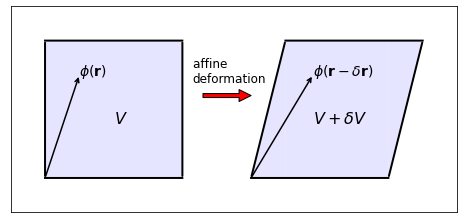

In [190]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/affine-deformation.png')

### Equation of state

Let us consider the shifted Landau free energy for liquid/gas phase separation:
\begin{equation}
\mathcal{F}[n] = \int dV \bigg\{ 
\underbrace{\frac{\alpha}{2}(n-n_c)^2 + \frac{\beta}{4}(n-n_c)^4}_{f(n)= \text{bulk energy density}} + 
\frac{\kappa}{2}|\nabla  n|^2 \bigg\},
\end{equation}
where $n_c,\beta,\kappa$ are positive and $\alpha$ can be positive or negative.
Here $n(\mathbf{r})>0$ represents the absolute number density of the fluid, rather than rescaled density $\phi(\mathbf{r})$, which can be positive or negative.
They are related through:
\begin{equation}
\phi(\mathbf{r}) = \frac{n(\mathbf{r})-n_c}{n_c}.
\end{equation}
For example, the number density of water molecules in liquid water at room temperature is $n\simeq 33.4\times 10^{27}\,\text{m}^{-3}$.
You can think of Landau free energy as a Taylor expansion of $\mathcal{F}[n]$ around the critical point $(\alpha=0,n=n_c)$ for small $n-n_c$.
In practice, one often uses Landau free energy even for large values of $n-n_c$, due to its simplicity.

For $\alpha<0$, the system favours phase separation into liquid and gas phase, whose number densities are given by the minima of the bulk energy density $f(n)$:
\begin{align}
n_l = n_c + \sqrt{\frac{-\alpha}{\beta}} \quad\text{and}\quad
n_g = n_c - \sqrt{\frac{-\alpha}{\beta}},
\end{align}
respectively.
Note that the parameter $n_c$ has to be large enough such that $0<n_g<n_l$, since we are working with absolute number density rather than rescaled density.

In the previous section, we have derived the isotropic pressure to be: 
\begin{equation}
P = n\mu - g, \text{ where }
\mu = \frac{\delta\mathcal{F}}{\delta n} \text{ and } 
g = f(n)+\frac{\kappa}{2}|\nabla n|^2.
\end{equation}
In the bulk, the isotropic pressure is simply given by $P(n)=n f'(n)-f(n)$, where $f(n)$ is the bulk free energy density.
For the Landau free energy given above, the isotropic pressure in the bulk is given by:
\begin{equation}
P(n) = \alpha n(n - n_c) + \beta n(n - n_c)^3 - 
\frac{\alpha}{2}(n - n_c)^2 - 
\frac{\beta}{4}(n - n_c)^4
\end{equation}
The above equation is also called the equation of state, which relates the pressure $P$ to number density $n$ and temperature $T$ (the temperature is absorbed inside the parameter $\alpha$).
Also note that we can add an arbitrary constant to $\mathcal{F}[n]$ and hence to $P(n)$, which does not affect the overall dynamics.
Finally, let us define the molar volume to be $\nu=1/n$, which is the average free volume occupied by a single molecule.
The equation of state in terms of the molar volume is:
\begin{equation}
P(\nu) = \alpha \nu^{-1}(\nu^{-1} - n_c) + \beta \nu^{-1}(\nu^{-1} - n_c)^3 - 
\frac{\alpha}{2}(\nu^{-1} - n_c)^2 - 
\frac{\beta}{4}(\nu^{-1} - n_c)^4.
\end{equation}
The figure below shows the plot of $P(\nu)$ as a function of $\nu$ for $\alpha<0$ (in some arbitrary units which we shouldn't worry about).

The isothermal compressibility is defined to be:
\begin{equation}
\kappa_T = -\frac{1}{\nu}\left(\frac{\partial \nu}{\partial P}\right)_T.
\end{equation}
$\kappa_T$ is like the resistance of the fluid against compression.
As you can see in the $P(\nu)$ plot below, for some range of $\nu$, the isothermal compressibility $\kappa_T$ is negative.
This signifies that the system is unstable for this range of $\nu$.
Physically, the system will spontaneously phase-separate into liquid and gas phase.
The steady (or equilibrium) state will consist of two macroscopic phases: liquid and gas phase, separated by an interface.
In this section, we assume the interface to be mostly flat (in the next section we will generalize this to a curved interface such as droplets).
To find the densities of the bulk liquid and gas phase, we have to equate the chemical potential of the liquid and the gas phase (otherwise current will diffuse from one phase to the other):
\begin{equation}
\mu_l = \mu_g \quad\Rightarrow\quad f'(n_l) = f'(n_g).
\end{equation}
The equation above alone is not enough to determine $n_l$ and $n_g$.
We also need to equate the pressure of the liquid phase to that of the gas phase:
\begin{equation}
P_l = P_g \quad\Rightarrow\quad n_l f'(n_l)-f(n_l) = n_g f'(n_g)-f(n_g).
\end{equation}
If the pressures are not equal, the interface, separating the liquid from the gas phase, will be pushed in the direction from high to low pressure.
If we solve the two simultaneous equations above for our symmetric Landau free energy $\mathcal{F}[n]$, we will find that the number densities of the liquid and the gas phase are given by the following expressions
\begin{align}
n_l = n_c + \sqrt{\frac{-\alpha}{\beta}} \quad\text{and}\quad
n_g = n_c - \sqrt{\frac{-\alpha}{\beta}},
\end{align}
which also happen to be the minima of the free energy $\mathcal{F}[n]$.

Now with this information, we can verify Maxwell's construction, which states that the integral of $P(\nu)-P_l$ from the liquid phase $\nu_l$ to the gas phase $\nu_g$ is zero.
In other words, the blue areas between the curve $P=P(\nu)$ and the line $P=P_l$ below add up to zero.
To show this, we consider (recall $\nu=1/n$):
\begin{align}
\int_{\nu_l}^{\nu_g} \left[ P(\nu) - P_l \right] d\nu &= \int_{n_g}^{n_l} \frac{P(n) - P_l}{n^2} dn \\
&= \int_{n_g}^{n_l} \frac{f'(n)}{n} dn - \int_{n_g}^{n_l} \frac{f(n)}{n^2} dn - P_l \int_{n_g}^{n_l} \frac{1}{n^2}dn \\
&= \left[\frac{f(n)}{n}\right]_{n_g}^{n_l} + \underbrace{\int_{n_g}^{n_l} \frac{f'(n)}{n^2} dn - \int_{n_g}^{n_l} \frac{f(n)}{n^2} dn}_{=0} + P_l \left(\frac{1}{n_l} - \frac{1}{n_g} \right) \\
&= \frac{f(n_l)}{n_l} - \frac{f(n_g)}{n_g} + \left[n_l f'(n_l) - f(n_l)\right] \left(\frac{1}{n_l} - \frac{1}{n_g} \right) \\
&= \frac{n_gf(n_l) - n_lf(n_g) + n_ln_gf'(n_l) - n_gf(n_l) - n_l^2f'(n_l) + n_lf(n_l)}{n_ln_g} \\
&= \frac{n_l\left[n_gf'(n_g) - f(n_g)\right] - n_l\left[n_lf'(n_l) - f(n_l)\right]}{n_ln_g},
\end{align}
where we have used the fact that $f'(n_l)=f'(n_g)$. 
Therefore the integral above becomes:
\begin{align}
\int_{\nu_l}^{\nu_g} \left[ P(\nu) - P_l \right] d\nu = \frac{P_g - P_l}{n_g} = 0,
\end{align}
since $P_l=P_g$.
Thus, we have verified Maxwell's construction.
Note that the derivation of the Maxwell's construction above remains valid for general double well potentials $f(n)$, which are not necessarily symmetric. 

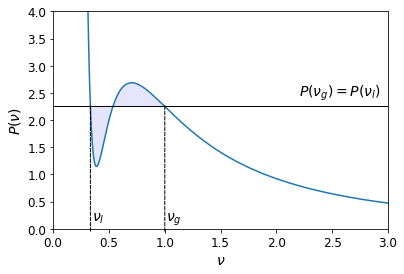

In [189]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/Maxwell-construction.png')

### Convection vs diffusion

Thus we have derived the formula for the elastic stress for the given free energy.
Under affine deformation, the fluid exerts some elastic stress to the walls, and also to each other inside the bulk.
However for a general deformation, this is not the only stress present in the fluid.
We also have a viscous stress, whose coefficient is called the viscosity, which is responsible for heat dissipation.

One might also notice that the presence or absence of a mechanical stress does not affect the Cahn-Hiliard equation:
\begin{equation}
\frac{\partial\phi}{\partial t} = M\nabla^2\frac{\delta\mathcal{F}}{\delta\phi} \quad \text{(Cahn-Hiliard equation)}
\end{equation}
This is because Cahn-Hiliard equation only describes the diffusion process in the binary fluid.
In general, there are two ways a fluid can move inside the system: 1) diffusion and 2) convection.

An example of diffusion process is when we put a drop of red ink inside a static and viscous solvent.
This ink will spread slowly until the whole fluid becomes homogenously red.
This diffusion process is due to the Brownian motion of the ink molecules.
Typically the higher the temperature is, the faster the diffusion process will be.

An example of convection is when we put a beach ball on a flowing river. 
This beach ball will move with the same velocity as the water.
If we put a drop of red ink on a flowing river, this blob of red ink will also move with the same velocity as the water, while at the same time diffuses around its centre of mass.
To describe the convection process in a binary fluid, we need to define another field, which is the velocity field $\mathbf{u}(\mathbf{r},t)$ (in addition to $\phi(\mathbf{r},t)$).
The time evolution of $\mathbf{u}(\mathbf{r},t)$ will be described by the Navier-Stokes equation:
\begin{equation}
\underbrace{\rho}_{\text{mass density}} \underbrace{\left(\frac{\partial}{\partial t} + \mathbf{u}\cdot\nabla\right)u_\alpha}_{\text{acceleration}} = 
\underbrace{\partial_\beta\sigma_{\alpha\beta}}_{\text{force density}}.\quad\text{(Navier-Stokes equation)}
\end{equation}
In essence, the Navier-Stokes equation is just a momentum conservation or Newton's second law.
Thus to take into account of both diffusion and convection process in a binary fluid properly, 
we need to solve the coupled Cahn-Hiliard-Navier-Stokes equation:
\begin{align}
\frac{\partial\phi}{\partial t} + (\mathbf{u}\cdot\nabla)\phi &= 
M\nabla^2\frac{\delta\mathcal{F}}{\delta\phi} \quad\text{(Cahn-Hiliard equation)} \\
\rho \left(\frac{\partial}{\partial t} + \mathbf{u}\cdot\nabla\right)u_\alpha &= 
\partial_\beta\sigma_{\alpha\beta} \quad\text{(Navier-Stokes equation)} \\
\nabla\cdot\mathbf{u} &= 0 \quad\text{(incompressibility condition)}. 
\end{align}
Notice that the first two equations are coupled through the stress tensor $\sigma_{\alpha\beta}$, which depends on $\phi$,
and the convection term $(\mathbf{u}\cdot\nabla)\phi$.

In practice, we can also define the diffusion timescale $t_{\text{diffusion}}$ and the convection timescale $t_{\text{convection}}$ to be:
\begin{align}
t_{\text{diffusion}} = \frac{L^2}{M\alpha} \quad\text{and}\quad
t_{\text{convection}} = \frac{L}{U},
\end{align}
where $L$ is the system size and $U$ is the typical magnitude of the fluid velocity in the system (such the velocity of the flowing river under gravity).
If $t_{\text{diffusion}}\ll t_{\text{convection}}$, then the diffusion process dominates over convection and the problem can be simply described by Cahn-Hiliard equation alone.

### Laplace pressure

Let us recall the Hamiltonian:
\begin{equation}
\mathcal{F}[\phi] = \int_V \bigg\{ \underbrace{\frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4}_{f(\phi)} + \frac{\kappa}{2}|\nabla\phi|^2 \bigg\},
\end{equation}
where $f(\phi)$ is the bulk (or local) free energy density.
In equilibrium, and far from any boundary or curved interface, the density of the fluid is given by the minima of this bulk energy density.
We call this density the binodal density $\pm\phi_B$:
\begin{equation}
\frac{df}{d\phi} = 0 \quad\Rightarrow\quad \phi=\pm\phi_B \quad\text{where}\quad \phi_B=\sqrt{\frac{-\alpha}{\beta}}.
\end{equation}
As we have seen above, for a flat interface, the equilibrium density of the fluid on either side of the flat interface is given by the binodal densities $\pm\phi_B$.
On the other hand if the interface is curved, such as a liquid droplet surrounded by the gas phase, the density of the liquid and the gas are not exactly at the binodals (shown in the figure below).
They are in fact shifted away from the binodal values due to Laplace pressure.
Let us denote $\phi_+$ to be the density of the liquid inside the droplet and $\phi_-$ to be the density of the gas outside. 
$\phi_\pm$ will be slightly shifted away from the binodal values, _i.e._:
\begin{equation}
\phi_\pm = \pm\phi_B + \epsilon_\pm \text{ (for curved interface)}.
\end{equation}
This is because the pressure inside the droplet will be slightly higher than that outside.
The difference in this pressure is called the Laplace pressure.

To illustrate this, let us consider a spherical liquid droplet of radius $R$ surrounded by gas phase, as shown in the figure below.
Let us denote $P_+$ and $P_-$ to be the pressure inside and outside the droplet respectively.
Now let us consider the upper hemispherical surface.
There are two forces acting on this hemispherical surface.
The first one is due to the pressure difference $\Delta P = P_+ - P_-$ (Laplace pressure).
The force acting on the upper hemispherical surface is equal to $\Delta P\,\pi R^2$ in the upwards direction.
The second force is due to the surface tension $\gamma$: the upper hemispherical surface is pulled by the lower hemisphere right at the equator.
This force is equal to $\gamma 2\pi R$ in the downwards direction.
Thus balancing the two forces, we get:
\begin{equation}
P_+ - P_- = \frac{2\gamma}{R}.
\end{equation}
Note that for $d$-dimensional spherical droplet, the Laplace pressure is given by:
\begin{equation}
P_+ - P_- = \frac{\gamma(d-1)}{R}.
\end{equation}

Apart from the force balance, the chemical potential inside the droplet also has to be the same as that outside the droplet.
If not, there will be a diffusive current from high chemical potential regions to low chemical potential regions.
Equating the two chemical potentials, we get:
\begin{equation}
\mu(\phi_+) = \mu(\phi_-).
\end{equation}
Now from the previous section, the chemical potential is given by the formula:
\begin{equation}
\mu = f'(\phi) - \kappa\nabla^2\phi.
\end{equation}
However since we are only interested in the value of $\mu$ in the bulk (where $\phi$ is uniform), we can ignore the gradient in $\phi$, and thus we get:
\begin{equation}
f'(\phi_+) = f'(\phi_-) \quad\Rightarrow\quad f'(\phi_B + \epsilon_+) = f'(-\phi_B + \epsilon_-).
\end{equation}
Next, we can Taylor expand:
\begin{align}
f'(\phi_B + \epsilon_+) &= f''(\phi_B) \epsilon_+ + \mathcal{O}(\epsilon^2) \\
f'(-\phi_B + \epsilon_-) &= f''(\phi_B) \epsilon_- + \mathcal{O}(\epsilon^2).
\end{align}
Note that since $f(\phi)$ is symmetric, $f''(\phi_B)=f''(-\phi_B)$.
Thus the equality of chemical potential implies that $\epsilon_+=\epsilon_-$, 
_i.e._ the values of $\phi_\pm$ are shifted by the same amount from the binodals.

Now let us go back to the Laplace pressure.
From the previous section, we have the formula for the pressure:
\begin{align}
P = \phi\mu - g, \text{ where } 
g = f(\phi) + \frac{\kappa}{2}|\nabla\phi|^2 \text{ and }
\mu = f'(\phi) - \kappa\nabla^2\phi.
\end{align}
Since we are only interested in the value of $P$ in the bulk, we can ignore the gradient terms to get:
\begin{equation}
P(\phi) = \phi f'(\phi) - f(\phi).
\end{equation}
Now subsituting this to the Laplace pressure equation, we get:
\begin{align}
\phi_+ f'(\phi_+) - \phi_- f'(\phi_-) - f(\phi_+) + f(\phi_-) &= \frac{2\gamma}{R} \\
(\phi_B+\epsilon) f'(\phi_B+\epsilon) - (-\phi_B+\epsilon) f'(-\phi_B+\epsilon) - f(\phi_B+\epsilon) + f(-\phi_B+\epsilon)  &= \frac{2\gamma}{R}
\end{align}
We can then Taylor expand for small $\epsilon$ and simplify to get
\begin{align}
\epsilon = \frac{\gamma}{R\phi_B f''(\phi_B)}.
\end{align}

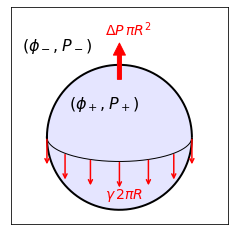

In [186]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/Laplace-pressure.png')

### Droplet evaporation

Now let us consider a single spherical liquid droplet of radius $R$, surrounded by the gas phase, as depicted in the figure below.
The density of the liquid inside the droplet and that of the gas just immediately outside the droplet will be shifted away from the binodal values due to the Laplace pressure as described in the previous section.
In particular, the density of the liquid inside the droplet and that of the gas on the surface of the droplet will be $\phi_B+\epsilon$ and $-\phi_B+\epsilon$ respectively, where
\begin{equation}
\phi_B = \sqrt{\frac{-\alpha}{\beta}}, \quad\text{and}\quad \epsilon = \frac{\gamma}{R\phi_B f''(\phi_B)}.
\end{equation}
Very far away from the droplet, the density of the gas phase will go back to its equilibrium bulk value, _i.e._ $-\phi_B$, as depicted in the figure below. 
Thus, we expect a chemical potential gradient from $\mu_R$ on the surface of the droplet to $0$ at infinity.
This chemical potential gradient will induce a current from the surface of the droplet to infinity, which then causes the droplet to shrink.

Assuming the radius of the droplet $R(t)$ shrinks slowly, we can assume the chemical potential of the gas phase to be quasi-static: $\nabla^2\mu=0$.
Assuming spherical symmetry, $\mu=\mu(r)$, we then have:
\begin{equation}
\frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\mu}{dr}\right) = 0 \quad\Rightarrow\quad
\mu(r) = \frac{A}{r} + B.
\end{equation}
Fixing the boundary conditions $\mu(R)=\mu_R$ and $\mu(\infty)=0$, we can solve the integration constants $A$ and $B$ to get $\mu(r)$ and subsequently $\mathbf{J}(r)$:
\begin{equation}
\mu(r) =
\begin{cases}
			\mu_R & \text{, } r<R \\
            \frac{\mu_R R}{r} & \text{, } r\ge R
\end{cases} \quad\Rightarrow\quad
\mathbf{J}(r) = -M\nabla\mu = 
\begin{cases}
			0 & \text{, } r<R \\
            \frac{M\mu_R R}{r^2}\hat{\mathbf{r}} & \text{, } r\ge R
\end{cases}.
\end{equation}
The chemical potential inside/on the surface of the droplet is:
\begin{equation}
\mu_R = f'(\phi_B+\epsilon) \simeq f''(\phi_B)\epsilon.
\end{equation}
Using conservation of mass and divergence theorem, we have:
\begin{equation}
\frac{d}{dt}\left[\frac{4}{3}\pi R^3 \Delta\phi \right] = -\oint_R \mathbf{J}\cdot d\mathbf{S},
\end{equation}
where $\Delta\phi=2\phi_B$ is the density difference between the outside and the inside of the droplet.
We can solve the above equation to get the differential equation for the droplet radius $R(t)$:
\begin{equation}
\frac{dR}{dt} = -\frac{M\gamma}{2\phi_B^2R^2} \quad\Rightarrow\quad
R(t) = \left[ R(0)^3 - \frac{3M\gamma}{2\phi_B^2}t \right]^{1/3}.
\end{equation}

Thus in an infinite sytem, a liquid droplet is always unstable and will evaporate completely (effectively the global density $\phi_0$ is close to the binodal $-\sqrt{\frac{-\alpha}{\beta}}$). 
However in computer simulations, the system size is finite and a liquid droplet can be made to be stable.

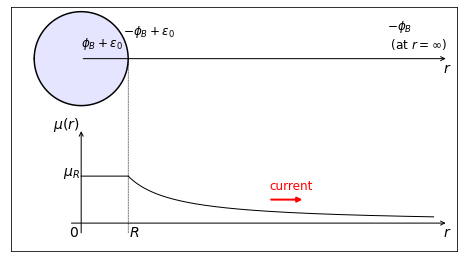

In [185]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/droplet-evaporation.png')

## Wetting

In this section we will consider a liquid droplet on a flat solid surface, surrounded by the gas phase (see figure below).
In this case, we have three different interfaces:
- liquid-gas interface
- solid-gas interface
- solid-liquid interface,

and three different surface tension: $\gamma_{lg}$, $\gamma_{sg}$, and $\gamma_{sl}$ for each respective interface.
The line where all the three interfaces meet is called the contact line (indicated by the red dot in the figure below).
In our two-dimensional case, the contact line extends in the $z$-direction.

The contact angle $\theta$ is defined to be the angle between the tangent line to the liquid-gas interface and the surface at the contact line at equilibrium (see figure below). 
If $\theta<90^\circ$, the surface is said to be hydrophilic (in the case of water), _i.e._, it attracts water.
If $\theta>90^\circ$, the surface is said to be hydrophobic, _i.e._, it repels water.

The goal of this section is to derive the suitable boundary conditions for the density field $\phi(\mathbf{r},t)$ at the surface (which we assume to be at $y=0$ and $y=L$) for a given contact angle $\theta$.

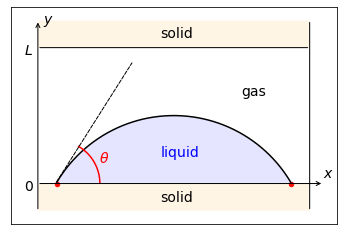

In [184]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/contact-angle.png')

### Young's equation

First we will express the contact angle $\theta$ in terms of the three surface tension: $\gamma_{lg}$, $\gamma_{sg}$, and $\gamma_{sl}$.
To do this let us consider one of the contact lines, indicated by the red dot in the figure below.
Note that the contact line extends infinitely in the $z$-direction (out of the screen).
The solid-liquid interface tends to pull this contact line to the right with magnitude $\gamma_{sl}$ (per unit length of the contact line).
The gas-solid interface, on the other hand, tends to pull this contact line to the left with magnitude $\gamma_{sg}$.
Finally the liquid-gas interface tends to pull the contact line upwards at an angle $\theta$, relative to the $x$-axis, with magnitude $\gamma_{lg}$.
These three interfacial forces acting on a single contact line are indicated by purple arrows in the figure below.

In equilibrium, the contact line should not move, so we balance the net force in the $x$-direction to get the Young's equation for the contact angle:
\begin{equation}
\gamma_{sg} = \gamma_{sl} + \gamma_{lg}\cos\theta \quad\Rightarrow\quad
\cos\theta = \frac{\gamma_{sg}-\gamma_{sl}}{\gamma_{lg}}.
\end{equation}

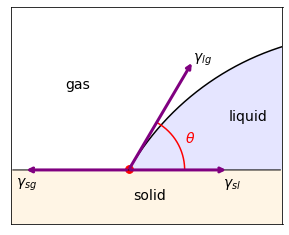

In [205]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/Youngs-equation.png')

### Surface free energy

So far we have written down the contact angle $\theta$ in terms of the three surface tension: $\gamma_{lg}$, $\gamma_{sg}$, and $\gamma_{sl}$, however, 
we have not yet discussed how we are going to implement the contact angle $\theta$ into our equation of motion, _i.e._, the Cahn-Hiliard equation. 
This is actually done by modifying our free energy functional to include the contribution from the surface energy:
\begin{equation}
\mathcal{F}[\phi] = \int_V \bigg[ \underbrace{\frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4}_{f(\phi)} + \frac{\kappa}{2}|\nabla\phi|^2 \bigg] dV - \int_\text{walls} h\phi \, dS,
\end{equation}
where $h$ is some constant, which depends on the contact angle $\theta$. 
The last term above is a surface integral over the two wall surfaces at $y=0$ and $y=L$ (assuming they both have the same contact angle $\theta$).
Thus, $h$ acts like an external field for $\phi$ on the surface. 
If $h>0$, it is more energetically favourable for the value of $\phi$ to go up on the surface (compared to that in the bulk).
This corresponds to an hydrophilic surface or $\theta<90^\circ$.
On the other hand if $h<0$, it more energetically favourable for the value of $\phi$ to go down on the surface.
This corresponds to an hydrophobic surface or $\theta>90^\circ$.

The equilibrium state of the droplet corresponds to the minimum of the free energy $F[\phi]$.
Let us now consider the variation in the free energy $F[\phi]$, when we vary the density field $\phi\rightarrow\phi+\delta\phi$:
\begin{align}
\delta F &= \int_V \bigg[ f'(\phi)\delta\phi + \kappa\nabla\phi\cdot\nabla\delta\phi \bigg]dV - 
\int_\text{walls} h\delta\phi \, dS \\
&= \int_V \bigg[ f'(\phi) - \kappa\nabla^2\phi \bigg]\delta\phi \, dV + 
   \int_V \kappa\nabla\cdot(\delta\phi\nabla\phi) \, dV - 
   \int_\text{walls} h\delta\phi \, dS,
\end{align}
where we have used integration by parts in the second line above.
Now using divergence theorem, the second term above becomes a surface integral over the whole system (see figure below):
\begin{align}
\int_V \kappa\nabla\cdot(\delta\phi\nabla\phi) \, dV &= 
\oint_{\partial V} \kappa \delta\phi\nabla\phi \cdot \hat{\mathbf{n}}\,dS \\
&= \int_{y=0} \kappa \delta\phi\nabla\phi\cdot(-\hat{\mathbf{y}})\,dS + 
   \int_{y=L} \kappa \delta\phi\nabla\phi\cdot\hat{\mathbf{y}}\,dS + 
\underbrace{
    \int_{x=0} \kappa \delta\phi\nabla\phi\cdot(-\hat{\mathbf{x}})\,dS + 
    \int_{x=L_x} \kappa \delta\phi\nabla\phi\cdot\hat{\mathbf{x}}\,dS 
}_{=0}.
\end{align}
Note that $\hat{\mathbf{n}}$ is the outward unit normal to the surface (see figure below). 
Using periodic boundary condition, the integral over $x=0$ and $x=L_x$ surface vanish.
Thus we end up with just the surface integrals over $y=0$ and $y=L$.
Finally, the variation in the free energy is then given by:
\begin{align}
\delta F = \int_V \bigg[ f'(\phi) - \kappa\nabla^2\phi \bigg]\delta\phi\,dV - 
           \int_{y=0} \bigg( \kappa \left.\frac{\partial\phi}{\partial y}\right|_{y=0} + h \bigg)\delta\phi\,dS +
           \int_{y=L} \bigg( \left.\frac{\partial\phi}{\partial y}\right|_{y=L} - h \bigg)\delta\phi\,dS.
\end{align}
Now in equilibrium, the variation in the free energy (with respect to $\delta\phi$) is equal to zero, _i.e._ $\delta F=0$.
Thus the volume term and the surface terms above should be equal to zero.
Equating the volume term to zero, we get:
\begin{equation}
f'(\phi) - \kappa\nabla^2\phi = 0,
\end{equation}
which is the same statement as the chemical potential being equal to zero: $\mu=0$.
Now equating the surface terms to zero, we get a boundary condition for $\phi$ at $y=0$ and $y=L$ respectively:
\begin{equation}
\left.\frac{\partial\phi}{\partial y}\right|_{y=0} = -\frac{h}{\kappa}, \quad\text{and}\quad
\left.\frac{\partial\phi}{\partial y}\right|_{y=L} = \frac{h}{\kappa}.
\end{equation}

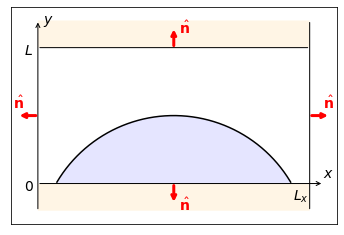

In [211]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/surface-integral.png')

### Densities at the walls

Now using the free energy functional given above, we will calculate the value of the density field $\phi$ at the bottom wall $y=0$.
(The calculation for the top wall is similar.)
For simplicity, let us assume a homogenous liquid inside the system.
The density of the liquid is equal to $\sqrt{\frac{-\alpha}{\beta}}$ everywhere in the system 
(except close to the walls).
Assuming $h>0$ for now, the density of the liquid at the walls, $\phi_{\text{wall}}$, will be slightly higher than that in the bulk, _i.e._ $\phi_{\text{wall}}>\sqrt{\frac{-\alpha}{\beta}}$ (see figure below).
Let us now calculate the value for $\phi_\text{wall}$.
From the previous section, we know that in equilibrium, the density field $\phi(y)$ satisfies the equation:
\begin{equation}
f'(\phi) - \kappa\frac{d^2\phi}{dy^2} = 0.
\end{equation}
Note that we assume the system to be homogenous along $x$.
Now multiplying the above equation with $\frac{d\phi}{dy}$, and then integrating over $y$ from $y=0$ to $y=\frac{L}{2}$, we get the __Noether's equation__:
\begin{align}
\int_0^{\frac{L}{2}} \frac{df}{dy} \, dy - 
\frac{\kappa}{2}\int_0^{\frac{L}{2}} \frac{d}{dy}\left(\frac{d\phi}{dy}\right)^2 dy &= 0 \\
f\left(\phi\left(\frac{L}{2}\right)\right) - f(\phi(y=0)) - 
\frac{\kappa}{2} 
\left[ 
    \left(\left.\frac{d\phi}{dy}\right|_{y=\frac{L}{2}}\right)^2 - \left(\left.\frac{d\phi}{dy}\right|_{y=0}\right)^2 
\right] &= 0.
\end{align}
However, we know that the value of $\phi(y)$ at $y=0$ is equal to $\phi_\text{wall}$ and the first derivative of $\phi(y)$ at $y=0$ is equal to $-\frac{h}{\kappa}$.
Furthermore, $\phi(y)$ at $y=\frac{L}{2}$ takes the bulk value $\sqrt{\frac{-\alpha}{\beta}}$ and its derivative is zero since $\phi$ is constant in the bulk (see figure below).
Therefore, the Noether's equation becomes:
\begin{align}
f\left(\sqrt{\frac{-\alpha}{\beta}}\right) - f(\phi_\text{wall}) + \frac{h^2}{2\kappa} = 0.
\end{align}
Now we can subsitute the $f(\phi) = \frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4$ to the equation above to get a quartic equation:
\begin{align}
\frac{\alpha}{2}\phi_\text{wall}^2 + \frac{\beta}{4}\phi_\text{wall}^4 + \frac{\alpha^2}{4\beta} - \frac{h^2}{2\kappa} = 0.
\end{align}
We can then solve this quartic equation to get density of the fluid at the wall (_i.e._ at $y=0$ in this case):
\begin{align}
\phi_\text{wall} = \pm\sqrt{\frac{-\alpha}{\beta}}\sqrt{1\pm\Omega}, \quad\text{where}\quad
\Omega = \sqrt{\frac{2\beta}{\kappa\alpha^2}}h.
\end{align}
In this case, since the density of the bulk is equal to $\sqrt{\frac{-\alpha}{\beta}}$ and $h>0$, 
the density of the fluid at the wall has to be larger than $\sqrt{\frac{-\alpha}{\beta}}$.
Therefore, the appropriate solution to the quartic equation is:
\begin{align}
\phi_\text{wall} = \sqrt{\frac{-\alpha}{\beta}}\sqrt{1+\Omega}.
\end{align}

We can easily generalize the result above to all four different cases: $h>0$, $h<0$, and liquid or gas bulk density.
The results are summarized in the table below:
\begin{equation}
\begin{array}{ |c|c|c| } 
  \hline
   & h>0 & h<0 \\ 
  \hline
  \text{liquid} & \phi_\text{wall}=\sqrt{\frac{-\alpha}{\beta}}\sqrt{1+\Omega} & \phi_\text{wall}=\sqrt{\frac{-\alpha}{\beta}}\sqrt{1+\Omega} \\ 
  \hline
  \text{gas} & \phi_\text{wall}=-\sqrt{\frac{-\alpha}{\beta}}\sqrt{1-\Omega} & \phi_\text{wall}=-\sqrt{\frac{-\alpha}{\beta}}\sqrt{1-\Omega} \\ 
  \hline
\end{array},
\end{equation}
where,
\begin{equation}
\Omega = \sqrt{\frac{2\beta}{\kappa\alpha^2}}h \quad\Leftrightarrow\quad
h = \sqrt{\frac{\kappa\alpha^2}{2\beta}}\Omega.
\end{equation}


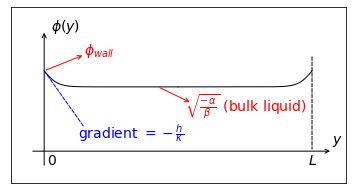

In [217]:
Image('https://raw.githubusercontent.com/elsentjhung/cahn-hilliard-droplet/master/figures/wall-density.png')

### Three surface tensions

After knowing the values of $\phi$ at the walls for the four different cases, we can now compute the three surface tensions: $\gamma_{lg}$, $\gamma_{sg}$, and $\gamma_{sl}$.
From the previous previous section, we have derived the liquid-gas surface tension:
\begin{equation}
\gamma_{lg} = \sqrt{\frac{-8\kappa\alpha^3}{9\beta^2}}.
\end{equation}
We are left two more surface tensions to compute.

Recall that the surface tension is the excess free energy of the interface (per surface area of the interface).
Therefore, the solid-liquid surface tension is given by (we approximate the bulk $y=\frac{L}{2}$ to be at infinity):
\begin{equation}
\gamma_{sl} = \int_0^\infty \bigg[ f(\phi) + \frac{\kappa}{2}\left(\frac{d\phi}{dy}\right)^2 \bigg]dy - h\phi_\text{wall} - \int_0^\infty f\left(\sqrt{\frac{-\alpha}{\beta}}\right)\,dy
\end{equation} 
We can then use Noether's equation again:
\begin{equation}
f(\phi) - \frac{\kappa}{2}\left(\frac{d\phi}{dy}\right)^2 = f\left(\sqrt{\frac{-\alpha}{\beta}}\right),
\end{equation}
so we get:
\begin{align}
\gamma_{sl} &= \kappa\int_0^\infty \left(\frac{d\phi}{dy}\right)^2 dy - h\phi_\text{wall} \\
&= \kappa\int_{\phi_\text{wall}}^{\sqrt{-\alpha/\beta}} \left(\frac{d\phi}{dy}\right) d\phi - h\phi_\text{wall}
\end{align}
Using Noether's equation again, we get:
\begin{align}
\gamma_{sl} &= \sqrt{2\kappa}\int_{\phi_\text{wall}}^{\sqrt{-\alpha/\beta}} \sqrt{f(\phi)+\frac{\alpha^2}{4\beta}}\,d\phi - h\phi_\text{wall}
\end{align}
However, we know that $\phi_\text{wall}=\sqrt{\frac{-\alpha}{\beta}}\sqrt{1+\Omega}$, thus,
\begin{align}
\gamma_{sl} &= \sqrt{2\kappa}\int_{\sqrt{\frac{-\alpha}{\beta}}\sqrt{1+\Omega}}^{\sqrt{\frac{-\alpha}{\beta}}} \sqrt{f(\phi)+\frac{\alpha^2}{4\beta}}\,d\phi - \sqrt{\frac{\kappa\alpha^2}{2\beta}}\Omega\sqrt{\frac{-\alpha}{\beta}}\sqrt{1+\Omega}.
\end{align}
Substituting $f(\phi)=\frac{\alpha}{2}\phi^2+\frac{\beta}{4}\phi^4$, we can evaluate the integral:
\begin{align}
\gamma_{sl} &= \sqrt{\frac{-2\kappa\alpha^3}{9\beta^2}}\left[1-\left(1-\frac{\Omega}{2}\right)\sqrt{1+\Omega}\right] -
\sqrt{\frac{-\kappa\alpha^3}{2\beta^2}}\Omega\sqrt{1+\Omega} \\
&= \frac{\gamma_{lg}}{2}\left[1-\left(1-\frac{\Omega}{2}\right)\sqrt{1+\Omega}\right] - 
\frac{3\gamma_{lg}}{4}\Omega\sqrt{1+\Omega} \\
&= \frac{\gamma_{lg}}{2} - \frac{\gamma_{lg}}{2}(1+\Omega)^{3/2}.
\end{align}

Similarly, we can compute the solid-gas surface tension:
\begin{align}
\gamma_{sg} &= \sqrt{2\kappa}\int_{-\sqrt{\frac{-\alpha}{\beta}}\sqrt{1-\Omega}}^{-\sqrt{\frac{-\alpha}{\beta}}} \sqrt{f(\phi)+\frac{\alpha^2}{4\beta}}\,d\phi + \sqrt{\frac{\kappa\alpha^2}{2\beta}}\Omega\sqrt{\frac{-\alpha}{\beta}}\sqrt{1-\Omega} \\
&= \sqrt{\frac{-2\kappa\alpha^3}{9\beta^2}}\left[1 - \left(1+\frac{\Omega}{2}\right)\sqrt{1-\Omega}\right] +
\sqrt{\frac{-\kappa\alpha^3}{2\beta^2}}\Omega\sqrt{1-\Omega} \\
&= \frac{\gamma_{lg}}{2} - \frac{\gamma_{lg}}{2}(1-\Omega)^{3/2}.
\end{align}

Finally, applying the Young's equation, we get:
\begin{align}
\cos\theta = \frac{\gamma_{sg}-\gamma_{sl}}{\gamma_{lg}} = 
\frac{1}{2}\left[ (1+\Omega)^{3/2} - (1-\Omega)^{3/2} \right].
\end{align}
The equation above can be inverted (??) to get $\Omega$ in terms of $\theta$:
\begin{equation}
\Omega = 2 \,\text{sign}\left(\frac{\pi}{2}-\theta\right)
\sqrt{ \cos\left(\frac{\alpha}{3}\right) \left[ 1 - \cos\left(\frac{\alpha}{3}\right) \right]},
\quad\text{where}\quad
\alpha = \cos^{-1}\left(\sin^2\theta\right).
\end{equation}
Thus for a given contact angle $\theta$, we can then find the appropriate value of $h$:
\begin{equation}
h = \sqrt{\frac{2\kappa\alpha^2}{\beta}} \,\text{sign}\left(\frac{\pi}{2}-\theta\right)
\sqrt{ \cos\left(\frac{\cos^{-1}\left(\sin^2\theta\right)}{3}\right) \left[ 1 - \cos\left(\frac{\cos^{-1}\left(\sin^2\theta\right)}{3}\right) \right]}
\end{equation}

### Computer simulations

Now we will put everything we have learnt above into practice.
Let us simulate a liquid droplet sitting on a flat solid surface with a given contact angle $\theta$.
Our dynamical variable is the density field $\phi(\mathbf{r},t)$.
In computer simulations, space is discretized into: $x\rightarrow i\Delta x$ and $x\rightarrow j\Delta y$,
where $i=0,1,2,\dots,N_x-1$ and $j=0,1,2,\dots,N_y-1$.
$\Delta x$ and $\Delta y$ are the lattice spacing in the $x$- and $y$-direction respectively.
Ideally we require $\Delta x$ and $\Delta y$ to be much smaller than $1$.
The system size is then $L_x=N_x\Delta x$ and $L_y=N_y\Delta y$.
Similarly, time is also discretized into $t\rightarrow n\Delta t$, where $n=0,1,2,\dots,N_t-1$, where $\Delta t$ is the time step.
The total time of the simulation is then $N_t\Delta t$.
Thus the density field becomes $\phi(\mathbf{r},t)\rightarrow\phi^n_{ij}$, which is represented as an array in Python:
\begin{align}
\phi_{ij} &=
\begin{pmatrix}
\phi_{00} & \phi_{01} & \ldots & \phi_{0,N_y-1} \\
\phi_{10} & \phi_{11} &  & \phi_{1,N_y-1} \\
\vdots &  & \ddots & \vdots \\
\phi_{N_x-1,0} & \phi_{N_x-1,1} & \ldots & \phi_{N_x-1,N_y-1} \\
\end{pmatrix} \downarrow i\text{-direction} \\
&\quad\quad\quad\quad\quad\longrightarrow j\text{-direction}
\end{align}
Note that the $x$- and $y$-axis are transposed.
The first and second derivatives are computed numerically as follow:
\begin{align}
\frac{\partial\phi}{\partial x} &= \frac{\phi_{i+1,j}-\phi_{i,j}}{\Delta x} + \mathcal{O}(\Delta x) \\
\frac{\partial^2\phi}{\partial x^2} &= \frac{\phi_{i+1,j}-2\phi_{i,j}+\phi_{i-1,j}}{\Delta x^2} + \mathcal{O}(\Delta x)
\end{align}
The array $\phi_{i+1,j}$ is then equivalent to shifting every elements inside the array $\phi_{ij}$ upwards.
This is represented by the `np.roll` function in Python:

`phi_i_plus_1 = np.roll(phi, -1, axis=0)`


In [77]:
import numpy as np
import matplotlib.pyplot as plt

class Wetting():
    # initialization
    def __init__(self, theta):
        # lattice parameters
        self.dx, self.dy = 1.0, 1.0 
        self.Nx, self.Ny = 64, 32
        self.dt = 0.01 
        self.Nt = 10000000

        # parameters of the free energy
        self.M, self.alpha, self.beta, self.kappa = 1.0, -1.0, 1.0, 1.0 

        # contact angle in radian
        self.theta = theta 
        a = np.arccos(np.sin(self.theta)**2)
        self.h = np.sqrt(2.0*self.kappa*a**2/self.beta) \
               * np.sign(0.5*np.pi-self.theta) \
               * np.sqrt(np.cos(a/3.0)*(1.0-np.cos(a/3.0)))

        # global variables
        self.phi = np.zeros((self.Nx, self.Ny))
        self.mu = np.zeros((self.Nx, self.Ny))

        # array of cartesian coordinates (needed for plotting)
        self.x = np.arange(0, self.Nx)*self.dx
        self.y = np.arange(0, self.Ny)*self.dx
        self.y, self.x = np.meshgrid(self.y, self.x) 

        # initialize phi to be a half-spherical droplet
        radius = self.Nx*self.dx/4.0
        for i in range(0, self.Nx, 1):
            for j in range(0, self.Ny, 1):
                if (i*self.dx-0.5*self.Nx*self.dx)**2 + (j*self.dx)**2 < radius**2:
                    self.phi[i,j] = np.sqrt(-self.alpha/self.beta)
                else:
                    self.phi[i,j] = -np.sqrt(-self.alpha/self.beta)

    # function to calculate second derivative
    def derivative_x_x(self, field):
        field_plus = np.roll(field, -1, axis=0)
        field_minus = np.roll(field, +1, axis=0)
        return (field_plus - 2*field + field_minus)/(self.dx**2)

    def derivative_y_y(self, field):
        field_plus = np.roll(field, -1, axis=1)
        field_minus = np.roll(field, +1, axis=1)

        # wall boundary condition
        if np.array_equiv(field, self.phi):
            field_minus[:,0] = field[:,0] + self.dx*self.h/self.kappa
            field_plus[:,self.Ny-1] = field[:,self.Ny-1]
        else:
            field_minus[:,0] = field[:,0]
            field_plus[:,self.Ny-1] = field[:,self.Ny-1]

        return (field_plus - 2*field + field_minus)/(self.dy**2)

    def laplacian(self, field):
        return self.derivative_x_x(field) + self.derivative_y_y(field)

    # function to update phi
    def update(self):
        self.mu = self.alpha*self.phi + self.beta*self.phi*self.phi*self.phi - self.kappa*self.laplacian(self.phi)
        self.phi = self.phi + self.dt*self.M*self.laplacian(self.mu)

    # simulation run
    def run(self):
        for nt in range(0, self.Nt, 1):
            self.update()
            if nt % 1000000 == 0:
                phi0 = np.sum(self.phi)/(self.Nx*self.dx*self.Ny*self.dy)
                print(f't = {nt*self.dt}, phi0 = {phi0}')

In [78]:
# hydrophilic case theta = 45 degrees
hydrophilic = Wetting(np.pi/4.0)
hydrophilic.run()

t = 0.0, phi0 = -0.59765625
t = 10000.0, phi0 = -0.5976562499999795
t = 20000.0, phi0 = -0.5976562499999944
t = 30000.0, phi0 = -0.5976562499949978
t = 40000.0, phi0 = -0.5976562499932141
t = 50000.0, phi0 = -0.5976562499823828
t = 60000.0, phi0 = -0.5976562499550506
t = 70000.0, phi0 = -0.597656249932575
t = 80000.0, phi0 = -0.5976562499109468
t = 90000.0, phi0 = -0.5976562498893808


In [91]:
# hydrophobic case theta = 135 degrees
hydrophobic = Wetting(3.0*np.pi/4.0)
hydrophobic.run()

t = 0.0, phi0 = -0.59765625
t = 10000.0, phi0 = -0.5976562499999762
t = 20000.0, phi0 = -0.5976562499984726
t = 30000.0, phi0 = -0.5976562499917414
t = 40000.0, phi0 = -0.597656249988029
t = 50000.0, phi0 = -0.597656249988029
t = 60000.0, phi0 = -0.597656249988029
t = 70000.0, phi0 = -0.597656249988029
t = 80000.0, phi0 = -0.597656249988029
t = 90000.0, phi0 = -0.597656249988029


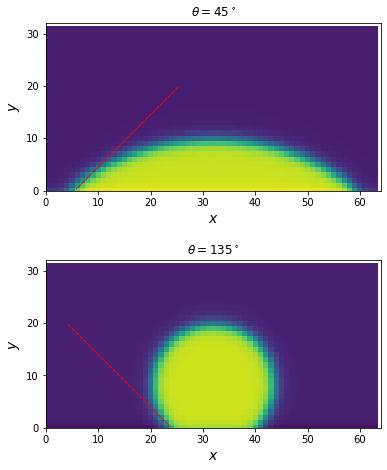

In [109]:
# initialize figure and movie objects
fig, ax = plt.subplots(2, 1, figsize=(6,8)) 

for n in range(0, 2, 1):
    # set label
    ax[n].set_xlabel("$x$", fontsize=14)
    ax[n].set_ylabel("$y$", fontsize=14)

    # set x range and y range
    ax[n].set_xlim(0, hydrophilic.Nx*hydrophilic.dx)
    ax[n].set_ylim(0, hydrophilic.Ny*hydrophilic.dy)

    # set tick interval
    ax[n].tick_params(axis="both")
    ax[n].set_xticks(np.arange(0, hydrophilic.Nx, 10)*hydrophilic.dx)
    ax[n].set_yticks(np.arange(0, hydrophilic.Ny, 10)*hydrophilic.dy)

    # set aspect ratio
    ax[n].set_aspect('equal')

# create colormap of phi
ax[0].set_title('$\\theta=45^\circ$')
colormap = ax[0].pcolormesh(hydrophilic.x, hydrophilic.y, hydrophilic.phi, shading='auto', vmin=-1.2, vmax=1.2)
ax[0].annotate('', xy=(5.5,0), xytext=(5.5+20,0+20), arrowprops=dict(edgecolor='red', arrowstyle='-', linestyle='--', linewidth=1))
ax[1].set_title('$\\theta=135^\circ$')
colormap = ax[1].pcolormesh(hydrophilic.x, hydrophilic.y, hydrophobic.phi, shading='auto', vmin=-1.2, vmax=1.2)
ax[1].annotate('', xy=(24,0), xytext=(24-20,0+20), arrowprops=dict(edgecolor='red', arrowstyle='-', linestyle='--', linewidth=1))

plt.show()

References:
1. L. D. Landau and E. M. Lifshitz, _Theory of Elasticity, 3rd Edition_ (Elsevier, 1986).
2. M. E. Cates and E. Tjhung, Theory of binary fluid mixtures: from phase-separation kinetics to active emulsions, _J. Fluid Mech._ (2017).
3. T. Kruger, H. Kusumaatmaja, A. Kuzmin, O. Shardt, G. Silva, and E. M. Viggen, _The Lattice Boltzmann Method_ (Springer, 2017)